<a href="https://colab.research.google.com/github/KimYooBin1/daily_coding/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#텐서플로 프로그래밍 : 퍼셉트론 학습

import tensorflow as tf

#OR 데이터 구축
x=[[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

#가중치 초기화
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))             #random.uniform([배열형태],범위)
b = tf.Variable(tf.zeros([1]))

#옵티마이저
opt=tf.keras.optimizers.Adam(learning_rate=0.1)

#전방 계산식
def forward():
  s=tf.add(tf.matmul(x,w),b)
  o=tf.tanh(s)
  return o

#손실 함수 정의
def loss():
  o=forward()
  return tf.reduce_mean((y-o)**2)

#500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
  opt.minimize(loss, var_list=[w,b])                          #opt.minimize(손실함수, 수정하는 가중치값)
  if(i%100==0): print('loss at epoch',i,'=',loss().numpy())   #loss().numpy() 넘파이 배열로 값 리턴

#학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 1.0407113
loss at epoch 100 = 0.014358789
loss at epoch 200 = 0.005339665
loss at epoch 300 = 0.002920617
loss at epoch 400 = 0.0018830022
tf.Tensor(
[[-0.9445776 ]
 [ 0.9641691 ]
 [ 0.96859163]
 [ 0.99998343]], shape=(4, 1), dtype=float32)


In [2]:
#케라스 프로그래밍: 퍼셉트론 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

#OR 데이터 구축
x=[[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))

perceptron.compile(loss='mse', optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 1s - loss: 1.0078 - mse: 1.0078 - 1s/epoch - 1s/step
Epoch 2/500
1/1 - 0s - loss: 0.7551 - mse: 0.7551 - 14ms/epoch - 14ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6437 - mse: 0.6437 - 13ms/epoch - 13ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5892 - mse: 0.5892 - 14ms/epoch - 14ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5564 - mse: 0.5564 - 13ms/epoch - 13ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5329 - mse: 0.5329 - 23ms/epoch - 23ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5140 - mse: 0.5140 - 13ms/epoch - 13ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4976 - mse: 0.4976 - 20ms/epoch - 20ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4828 - mse: 0.4828 - 27ms/epoch - 27ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4689 - mse: 0.4689 - 15ms/epoch - 15ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4558 - mse: 0.4558 - 7ms/epoch - 7ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4433 - mse: 0.4433 - 8ms/epoch - 8ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4312 - mse: 0.4312 - 22ms/epoch - 22ms/step
Epoch 14/500
1/1 - 0s - loss:

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation = 'tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)            #batch_size: size만큼 지난후 가중치 갱신 validation_data: 테스트 집합 검증

res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은",res[1]*100)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 8s - loss: 0.0424 - accuracy: 0.8478 - val_loss: 0.0274 - val_accuracy: 0.9130 - 8s/epoch - 16ms/step
Epoch 2/30
469/469 - 7s - loss: 0.0223 - accuracy: 0.9276 - val_loss: 0.0182 - val_accuracy: 0.9437 - 7s/epoch - 15ms/step
Epoch 3/30
469/469 - 7s - loss: 0.0163 - accuracy: 0.9474 - val_loss: 0.0144 - val_accuracy: 0.9516 - 7s/epoch - 15ms/step
Epoch 4/30
469/469 - 7s - loss: 0.0137 - accuracy: 0.9576 - val_loss: 0.0125 - val_accuracy: 0.9565 - 7s/epoch - 15ms/step
Epoch 5/30
469/469 - 7s - loss: 0.0121 - accuracy: 0.9632 - val_loss: 0.0116 - val_accuracy: 0.9620 - 7s/epoch - 15ms/step
Epoch 6/30
469/469 - 7s - loss: 0.0110 - accuracy: 0.9675 - val_loss: 0.0111 - val_accuracy: 0.9637 - 7s/epoch - 15ms/step
Epoch 7/30
469/469 - 7s - loss: 0.0101 - accuracy: 0.9710 - val_loss: 0.0101 - val_accuracy: 0.9668 - 7s/epoch - 15ms/step
Epoch 8/30
469/469 - 7s - loss: 0.0094 - accuracy: 0.9737 - val_loss: 0.01

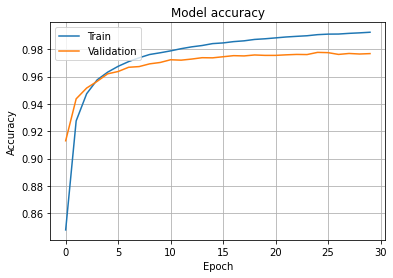

In [4]:
import matplotlib.pyplot as plt

#정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

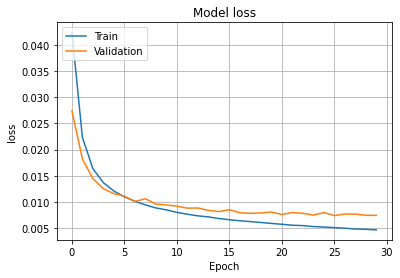

In [5]:
#손실함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs= 30, validation_data=(x_test, y_test), verbose=2)

res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 8s - loss: 0.0430 - accuracy: 0.8394 - val_loss: 0.0265 - val_accuracy: 0.9154 - 8s/epoch - 16ms/step
Epoch 2/30
469/469 - 7s - loss: 0.0219 - accuracy: 0.9308 - val_loss: 0.0174 - val_accuracy: 0.9438 - 7s/epoch - 16ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0161 - accuracy: 0.9489 - val_loss: 0.0152 - val_accuracy: 0.9539 - 8s/epoch - 18ms/step
Epoch 4/30
469/469 - 9s - loss: 0.0135 - accuracy: 0.9578 - val_loss: 0.0123 - val_accuracy: 0.9591 - 9s/epoch - 18ms/step
Epoch 5/30
469/469 - 8s - loss: 0.0118 - accuracy: 0.9641 - val_loss: 0.0122 - val_accuracy: 0.9634 - 8s/epoch - 18ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0108 - accuracy: 0.9688 - val_loss: 0.0115 - val_accuracy: 0.9646 - 8s/epoch - 17ms/step
Epoch 7/30
469/469 - 8s - loss: 0.0099 - accuracy: 0.9718 - val_loss: 0.0106 - val_accuracy: 0.9680 - 8s/epoch - 18ms/step
Epoch 8/30
469/469 - 8s - loss: 0.0093 - accuracy: 0.9745 - val_loss: 0.0096 - val_accuracy: 0.9687 - 8s/epoch - 17ms/step
Epoch 9/30
469/4

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#MNIST를 읽어 신경망에 입력할 형태 변환
(x_train, y_trian),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/ 255.0
y_train = tf.keras.utils.to_categorical(y_trian, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#신경망 구조 설정
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

#신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

#신경망 학습
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs=1, validation_data=(x_test, y_test), verbose=2)

#신경망 정확률 측정
res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은",res[1]*100)

469/469 - 20s - loss: 0.0260 - accuracy: 0.8974 - val_loss: 0.0129 - val_accuracy: 0.9433 - 20s/epoch - 43ms/step
정확률은 94.33000087738037


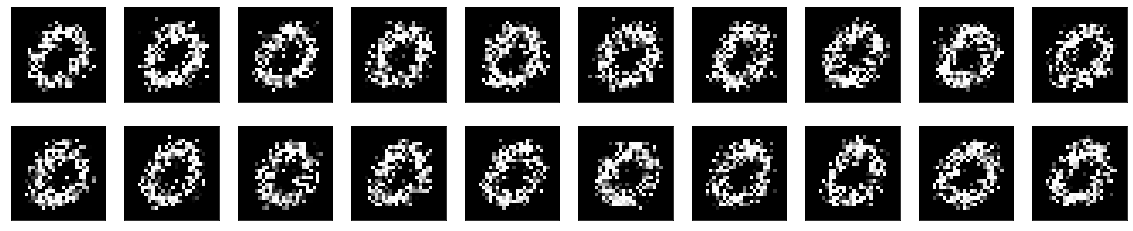

In [21]:
import numpy as np
from tensorflow.keras.datasets import mnist

#mnist 데이터를 읽고 0패턴만 추출
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = x_train[np.isin(y_train,[0])]

#화소 수준의 확률 생성 모델 구축
P=np.zeros((28, 28, 256))
for k in range(X.shape[0]):
  for i in range(X.shape[1]):
    for j in range(X.shape[2]):
      P[i][j][X[k][i][j]]+=1
P=P/X.shape[0]

#확률 생성 모델을 이용하여 20개 샘플을 생성
Xnew = np.zeros((20, 28, 28))
for i in range(20):
  for r in range(28):
    for c in range(28):
      Xnew[i][r][c] = np.random.choice(range(256),p=P[r][c])

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for r in range(2):
  for c in range(10):
    plt.subplot(2,10,r*10+c+1)
    plt.imshow(Xnew[r*10+c], cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()